In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sweetviz as sv
from IPython.display import HTML

ModuleNotFoundError: No module named 'sweetviz'

In [2]:
data = pd.read_excel("Documents/Felipe Camelo/Maestría/student-mat.xlsx")

In [3]:
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
data.columns = ['escuela','genero','edad','ubicacion','cantfami','padreseparados','educamadre','educapadre','trabajomadre','trabajopadre','razón','tutor','tdesplaza','testudio','clasesperdidas','tutorias','tutorfamilia','clasesextra','extracur','enfermeria','univer','internet','pareja','relacionfamilia','tiempolibre','salidaamigos','alcohols','alcoholw','estadosalud','inasistencia','g1','g2','g3']
data.head(3)

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [6]:
def RevisorData(dfe):
  columna = dfe.columns
  dato = [dfe[col].dtype for col in dfe]
  tipo = ['Discreta' if dfe[col].dtype == 'int64' else 'Continua' if dfe[col].dtype == 'float64' or dfe[col].dtype == 'timedelta64[ns]' else 'Categórica' for col in dfe] 
  cant = dfe.dropna().count()
  uni = [len(dfe[col].dropna().unique()) for col in dfe]
  nul = dfe.isnull().sum()
  mod = [dfe[col].value_counts().idxmax() for col in dfe]
  c_mod = [len((dfe[dfe[col]==dfe[col].value_counts().idxmax()])) for col in dfe]
  maxi = [dfe[col].dropna().max() if dfe[col].dtype !='object' else dfe[col].dropna().astype('str').max() for col in dfe]
  mini = [dfe[col].dropna().min() if dfe[col].dtype !='object' else dfe[col].dropna().astype('str').min() for col in dfe]

  tabla_revisa = pd.DataFrame({'Nombre':columna,'Dato':dato,'Tipo':tipo,'Valores_unicos':uni,'Valores_nulos':nul,'Moda':mod,'Cantidad_moda':c_mod,'Máximo':maxi,'Mínimo':mini})
  
  return tabla_revisa

In [7]:
data.shape

(395, 33)

In [8]:
RevisorData(data)

,Nombre,Dato,Tipo,Valores_unicos,Valores_nulos,Moda,Cantidad_moda,Máximo,Mínimo
escuela,escuela,object,Categórica,2,0,GP,349,MS,GP
genero,genero,object,Categórica,2,0,F,208,M,F
edad,edad,int64,Discreta,8,0,16,104,22,15
ubicacion,ubicacion,object,Categórica,2,0,U,307,U,R
cantfami,cantfami,object,Categórica,2,0,GT3,281,LE3,GT3
padreseparados,padreseparados,object,Categórica,2,0,T,354,T,A
educamadre,educamadre,int64,Discreta,5,0,4,131,4,0
educapadre,educapadre,int64,Discreta,5,0,2,115,4,0
trabajomadre,trabajomadre,object,Categórica,5,0,other,141,teacher,at_home
trabajopadre,trabajopadre,object,Categórica,5,0,other,217,teacher,at_home


In [9]:
dc = data.select_dtypes(include=['object','category'])
dd = data.select_dtypes(include='int64')

In [10]:
print('Variables Categoricas: \n')
dc.head(3)

Variables Categoricas: 



,escuela,genero,ubicacion,cantfami,padreseparados,trabajomadre,trabajopadre,razón,tutor,tutorias,tutorfamilia,clasesextra,extracur,enfermeria,univer,internet,pareja
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no


In [11]:
print('Variables Discretas: \n')
dd.head(3)

Variables Discretas: 



,edad,educamadre,educapadre,tdesplaza,testudio,clasesperdidas,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10


In [12]:
dc = data.loc[:,['escuela','genero','ubicacion','cantfami','padreseparados','educamadre','educapadre','trabajomadre','trabajopadre','razón','tutor','tdesplaza','testudio','clasesperdidas','tutorias','tutorfamilia','clasesextra','extracur','enfermeria','univer','internet','pareja','relacionfamilia','tiempolibre','salidaamigos','alcohols','alcoholw','estadosalud']]
dc.head(3)

,escuela,genero,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,razón,...,enfermeria,univer,internet,pareja,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,1,1,3
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,1,1,3
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,2,3,3


**Analisis Univariado

***Analisis variables continuas

In [13]:
dd= data.loc[:,['edad','inasistencia','g1','g2','g3']]
dd

,edad,inasistencia,g1,g2,g3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10
...,...,...,...,...,...
390,20,11,9,9,9
391,17,3,14,16,16
392,21,3,10,8,7
393,18,0,11,12,10


Con el objetivo de conocer el comportamiento de cada de una de las variables, se realizó un diagrama de "bigotes" y de esta forma conocer el comportamiento de cada variable y de esta forma identificar si tiene algun tipo de datos erroneos con contribuyan a errores en el analisis del mismo

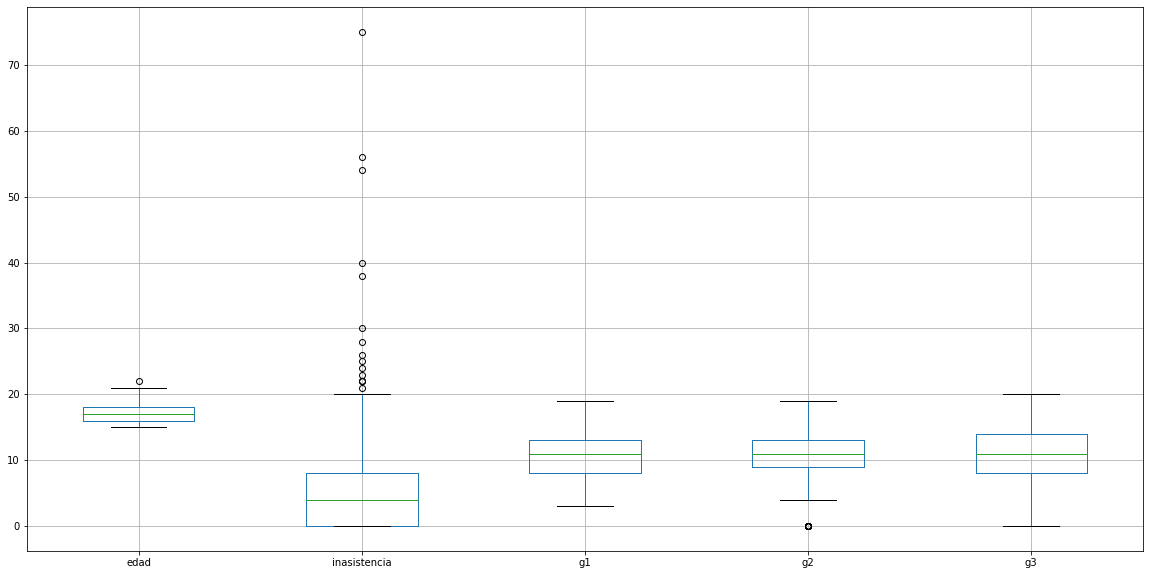

In [14]:
dd.boxplot(return_type='dict', figsize=(20,10))
plt.show()

****Variable Edad

In [15]:
max = dd['edad'].max()
uout_edad = (data['edad']>= max)
out_edad = data[uout_edad]
out_edad

,escuela,genero,edad,ubicacion,cantfami,padreseparados,educamadre,educapadre,trabajomadre,trabajopadre,...,relacionfamilia,tiempolibre,salidaamigos,alcohols,alcoholw,estadosalud,inasistencia,g1,g2,g3
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,16,6,8,8


Text(0.5, 1.0, 'Edad')

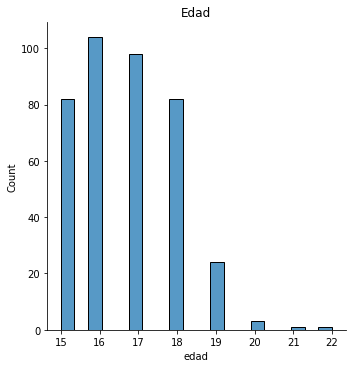

In [16]:
sns.displot(x = dd['edad'], bins=20)
ax = plt.gca()
ax.set_title('Edad')

Finalmente al analizar el comportamiento de la variable edad, observamos que esta se encuentra sesgada a la izquierda obteniendo un promedio de 16 años.

****Variable Inasistencia

Text(0.5, 1.0, 'Inasistencia a clases')

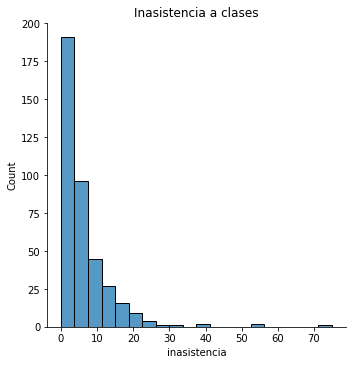

In [17]:
sns.displot(x = dd['inasistencia'], bins=20)
ax = plt.gca()
ax.set_title('Inasistencia a clases')

In [18]:
Q1_ina=dd['inasistencia'].quantile(0.25)
print('Primer cuartil', Q1_ina)

Q3_ina=dd['inasistencia'].quantile(0.75)
print('Tercer cuartil', Q3_ina)

IQR_ina=Q3_ina-Q1_ina
print('Rango intercuartil', IQR_ina)

Mediana_ina =dd['inasistencia'].median()
print('Mediana', Mediana_ina)

Valor_mínimo_ina=dd['inasistencia'].min()
print('Valor mínimo', Valor_mínimo_ina)

Valor_máximo_ina=dd['inasistencia'].max()
print('Valor máximo', Valor_máximo_ina)

Primer cuartil 0.0
Tercer cuartil 8.0
Rango intercuartil 8.0
Mediana 4.0
Valor mínimo 0
Valor máximo 75


In [19]:
BI_ina=(Q1_ina-(1.5 * IQR_ina))
print('BI_Calculado \n', BI_ina)

BS_ina=(Q3_ina+(1.5 * IQR_ina))
print('BS_Calculado \n', BS_ina)

BI_Calculado 
 -12.0
BS_Calculado 
 20.0


In [20]:
uout_ina = ((dd['inasistencia'] >BS_ina))
out_ina = dd[uout_ina]
out_ina

,edad,inasistencia,g1,g2,g3
40,16,25,7,10,11
74,16,54,11,12,11
103,15,26,7,6,6
183,17,56,9,9,8
198,17,24,18,18,18
205,17,28,10,9,9
216,17,22,6,6,4
260,18,21,17,18,18
276,18,75,10,9,9
277,18,22,9,9,9


In [21]:
out_ina.shape

(15, 5)

Al analizar los datos atipicos de la variable "inasistencia", encontramos 15 valores atipicos, los cuales superan el limite superior definido en 20, ...

****Variable notas primer corte

Text(0.5, 1.0, 'Notas G1')

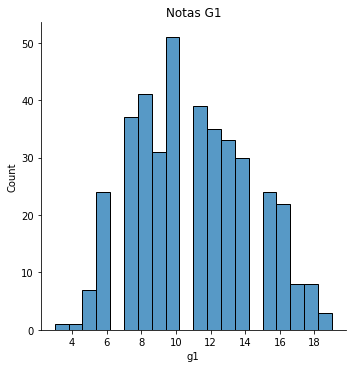

In [22]:
sns.displot(x = dd['g1'], bins=20)
ax = plt.gca()
ax.set_title('Notas G1')

****Variable notas segundo corte

Text(0.5, 1.0, 'Notas G2')

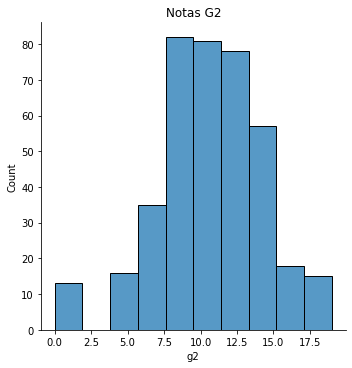

In [23]:
sns.displot(x = dd['g2'], bins=10)
ax = plt.gca()
ax.set_title('Notas G2')

In [24]:
Q1_g2=dd['g2'].quantile(0.25)
print('Primer cuartil', Q1_g2)

Q3_g2=dd['g2'].quantile(0.75)
print('Tercer cuartil', Q3_g2)

IQR_g2=Q3_g2-Q1_g2
print('Rango intercuartil', IQR_g2)

Mediana_g2 =dd['g2'].median()
print('Mediana', Mediana_g2)

Valor_mínimo_g2=dd['g2'].min()
print('Valor mínimo', Valor_mínimo_g2)

Valor_máximo_g2=dd['g2'].max()
print('Valor máximo', Valor_máximo_g2)

Primer cuartil 9.0
Tercer cuartil 13.0
Rango intercuartil 4.0
Mediana 11.0
Valor mínimo 0
Valor máximo 19


****Variable notas finales

Text(0.5, 1.0, 'Notas G3')

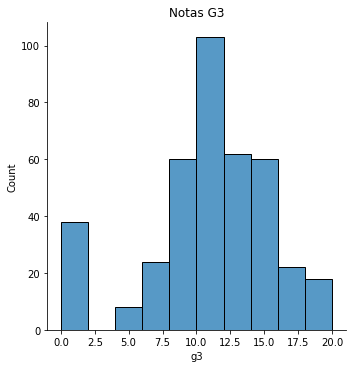

In [25]:
sns.displot(x = dd['g3'], bins=10)
ax = plt.gca()
ax.set_title('Notas G3')

***Analisis variables categoricas

C:\Users\jcamelo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


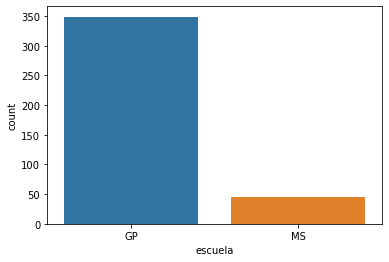

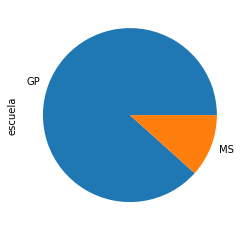

In [51]:
sns.countplot(dc["escuela"])
plt.show()
dc["escuela"].value_counts().plot.pie()
plt.show()

In [ ]:
sns.countplot(dc["escuela"])
plt.show()
dc["escuela"].value_counts().plot.pie()
plt.show()

**Analisis Bi-Variado

***Variables continuas

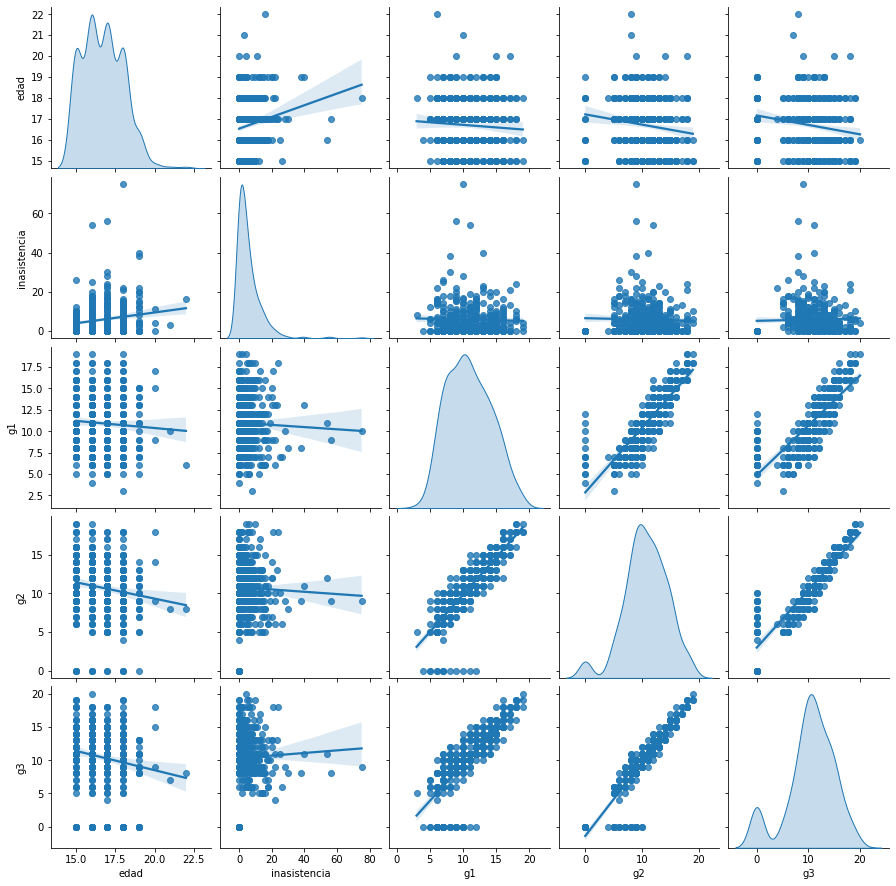

In [26]:
sns.pairplot(dd, kind = 'reg',diag_kind='kde')

<AxesSubplot:>

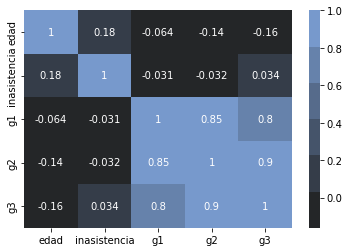

In [27]:
sns.heatmap(dd.corr(), annot=True, cmap=sns.dark_palette("#79C"))